# Programming for data science week 5 - tijdserie-analyse

### Leerdoelen
- Je leert wat een ARIMA model is, en wat de termen AR, I en MA betekenen
- Je leert wat de invloed is van de verschillende termen op de vorm van een tijdsserie
- Je leert hoe je orde van een ARIMA model kan bepalen voor de AR, I en MA termen. 
- Je leert de output van een ARIMA model interpreteren

<div>
<img src="img/Picture1.png" width="600">
</div>

### Achtergrondinformatie:
- Google naar:
    - `python arima model`
    - `python interpret arima model output`
    - `stationairity in timeseries`
    - `acf vs pacf plot`
- Datacamp course `Time Series Analysis in Python`. 

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 
- De tijdsindicaties gaan uit van het lezen van de uitleg en instructie en de programmeervaardigheden die in de voorgaande weken zijn opgedaan. 

# ARIMA modellen
Het doel van een ARIMA model is het nabootsen van een tijdsserie. Dit wordt gedaan door de variaties in de data te modelleren door middel van de volgende drie opties: 

- AR (auto-regressief), voorgaande waardes worden gebruikt om nieuwe waardes te voorspellen.
- I (integrated), niet de originele serie maar een gedifferentieerde tijdsserie wordt gebruikt. Dit om de tijdsserie stationair te maken. 
- MA (moving average), voorafgaande fouten worden gebruikt om nieuwe fouten voorspellen. Dit heeft een smoothing effect, een bewegend gemiddelde. 

Door deze effecten te mengen kun je de meeste tijdsseries nabootsen. In de volgende sectie gaan we de effecten van de AR en MA termen op een tijdsserie bekijken. 

# Model assessment
Na het realiseren van verschillende ARIMA modellen geven we een onderbouwd advies óf en zo ja wélk van deze modellen het geschiktst is voor de analyse van deze tijdreeksen.

In [ ]:
# nuttige Jupyter Notebook Magic
%config IPCompleter.greedy = True
%matplotlib inline

# Business understanding
We willen een voorspelling kunnen doen wat de beurskoers van een aandeel de komende dag gaat doen, zodat we kunnen bepalen of we dit aandeel net voor het sluiten van de beurs willen aanschaffen om het later met winst te kunnen verkopen.

# Data understanding

1. In welk format is de data (aangeleverd)? 
         [NIEUW] online beschikbaar via een API
2. Hoe kun je de databron benaderen vanuit python? 
         [NIEUW] m.b.v. een package dat nog niet aan de Anaconda environment is toegevoegd. 
3. Data exploreren:
       a. Informatie over de database
        - Welke tabellen (evt. collections) staan er in de database?
        - Welke kolommen (variabelen) vinden we terug in elke tabel? Kun je aan elke kolom betekenis geven??
        - Wat is het aantal records per tabel?
        - Welke datatypes vinden we terug in de tabellen?
        - Zijn er lege cellen?
       b. Vul dit evt. aan met beschrijvende statistiek, kijk alvast vooruit naar het regressiemodel
       c. Visualiseer de data op een slimme manier, kijk alvast vooruit naar het regressiemodel
       d. Zijn alle variabelen van nominaal of ratio meetniveau? Welke invloed heeft dit op de volgende stappen?
       e. Welk type regressiemodel is waarschijnlijk geschikt om de verbanden te onderzoeken?

We kunnen de API van [Yahoo Finance](https://finance.yahoo.com/) gebruiken om de handelsdata van een aandeel te verkrijgen. Hiervoor moeten we eerst de library toevoegen aan onze pythonomgeving. Dit kan niet via de standaardkanalen van Anaconda, maar wel m.b.v. de package installer van python (pip).

![title](img\yfinance.png)

We kunnen nu de libraries van Yahoo Finance in onze eigen python-omgeving importeren.

In [12]:
# [10 min] installeer het Yahoo Finance package in je python-werkomgeving 
# zorg dat het package in dit Jupyter Notebook gebruikt kan worden.

import yfinance as yf
import seaborn as sns
import pandas as pd

We gaan het tijdreeksmodel trainen voor de slotkoersen van Apple aan de Dow Jones. We gebruiken een periode van vijf jaar aan gegevens. Op de website van [Yahoo Finance](finance.yahoo.com) hebben we gevonden dat de korte naam voor het aandeel van Apple `AAPL` is.

In [50]:
#[10 min] Geef hieronder de code om de data te importeren en beschrijf de data
#controleer of het aantal datapunten overeenkomt met het aantal handelsdagen in deze periode.
#onderbouw welke variabele het best gebruikt om de slotkoers te bepalen het beste aansluit bij het business doel. 

koers_aandeel = yf.download('AAPL', start='2015-01-01', end='2019-12-31')
df = koers_aandeel

[*********************100%***********************]  1 of 1 completed


### Data exploratie
Onderzoek het verloop van de beurskoers van het aandeel in deze periode laat zien.

In [6]:
#[10 minuten] Exploreer de variabelen m.b.v. centrum- en spreidingsmaten.
# Gebruik een lijngrafiek om het verloop van de beurskoer te visualiseren.
#maak notities voor belangrijke bevindingen en/of zaken om later op te letten.
#Bewerk de vetgedrukte tekst bij de onderstaande bevindingen. 
#Laat alleen de tekst staan die past bij deze situatie.

koers_aandeel.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,24.951864,165613600
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.714508,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.018265,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.020525,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.357342,160423600


In [10]:
koers_aandeel.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
koers_aandeel.describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,38.6,11.0,22.5,28.9,37.5,46.4,72.8
High,1258.0,38.9,11.1,22.9,29.1,38.0,46.8,73.5
Low,1258.0,38.2,10.9,22.4,28.6,37.3,46.1,72.0
Close,1258.0,38.6,11.0,22.6,28.9,37.6,46.5,72.9
Adj Close,1258.0,36.7,11.3,21.0,26.6,35.8,44.9,71.7
Volume,1258.0,143651122.7,71530512.4,45448000.0,95122900.0,126454400.0,171458200.0,648825200.0


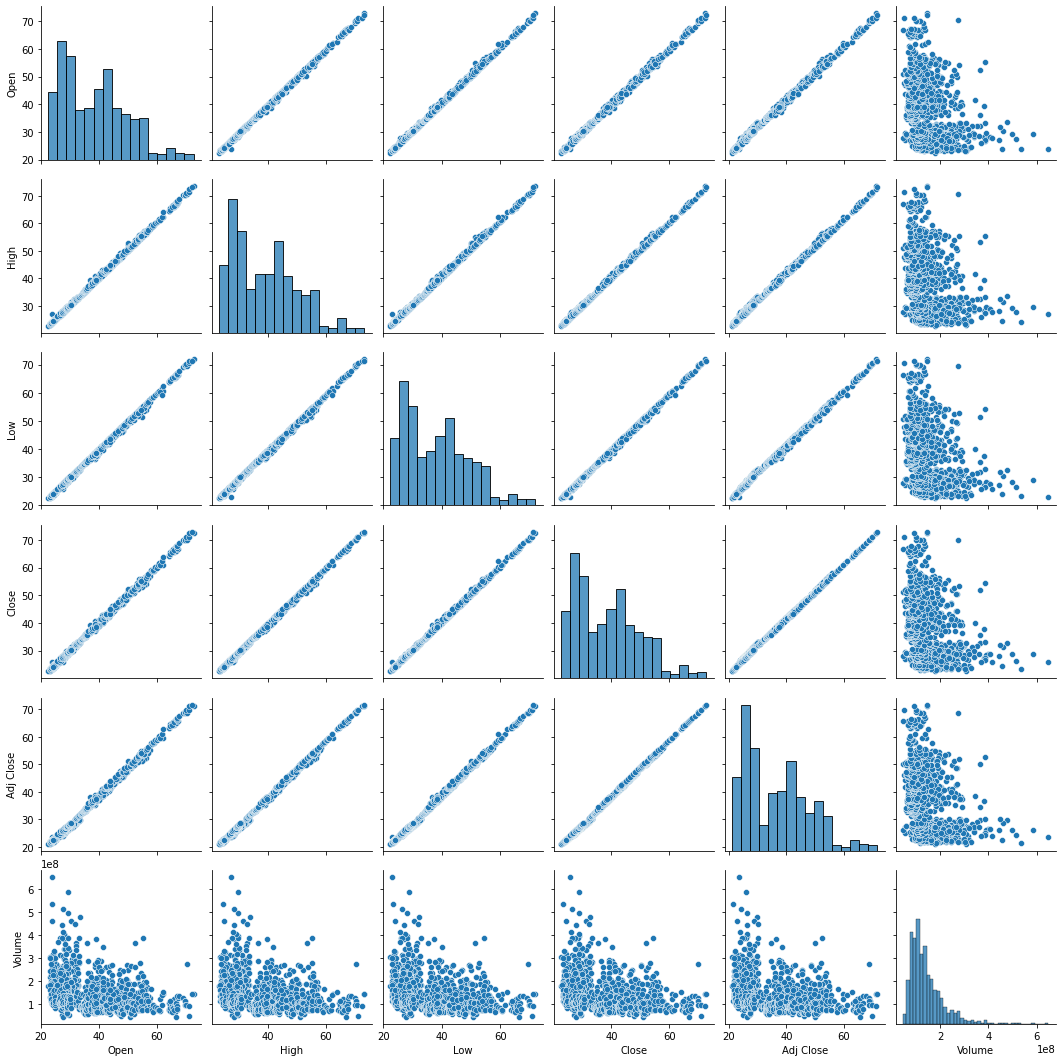

In [13]:
sns.pairplot(koers_aandeel)

In [20]:
df.corr().round(2)

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,-0.34
High,1.00,1.00,1.00,1.00,1.00,-0.33
Low,1.00,1.00,1.00,1.00,1.00,-0.35
Close,1.00,1.00,1.00,1.00,1.00,-0.34
Adj Close,1.00,1.00,1.00,1.00,1.00,-0.35
Volume,-0.34,-0.33,-0.35,-0.34,-0.35,1.00


<AxesSubplot:xlabel='Date'>

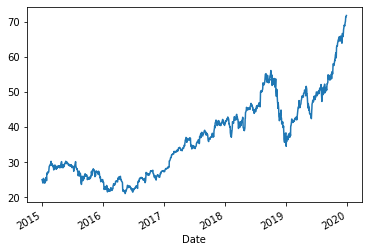

In [18]:
df = koers_aandeel

df['Adj Close'].plot()

Hier vallen de volgende zaken op:

**Vul dit stuk aan: geef een lijst met zaken die je opvallen.**


We hebben in de Datacamp course [`Simple Time Series`](https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=11)  die we als voorbereiding op deze les gemaakt hebben geleerd dat de data stabiel (stationair) moet zijn om een tijdreeksmodel te kunnen maken waarbij de Auto Regressie en Moving Average worden gebruikt om voorspellingen te kunnen doen. Dit kan in het ARIMA-model eventueel door het instellen van de I-parameter.

Preparatie van de data is **wel/niet** nodig omdat de beurskoers een **dalende/stijgende/gelijkblijvende** trend laat zien, en dus niet stationair is. 

## Datapreparatie
**Prepareer de data als dat nodig is** 

## Data modeling
### Modelkeuze
Het is mogelijk om een regressiemodel te kiezen waarin de onafhankelijke variabele tijd wordt meegenomen en waarbij de data door het model stationair wordt gemaakt. Dit is het `ARIMA`-model. De Integrated (I)-parameter geeft aan welke afgeleide wordt meegenomen om het model stationair te maken. 

Bepaal welke afgeleide nodig is om het model stationair te maken (de lijn loopt dan horizontaal). Dit bepaalt de instelling voor de I-parameter.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'geen afgeleide')

<AxesSubplot:title={'center':'geen afgeleide'}, xlabel='Date'>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'eerste afgeleide')

<AxesSubplot:title={'center':'eerste afgeleide'}, xlabel='Date'>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'dubbele afgeleide')

<AxesSubplot:title={'center':'dubbele afgeleide'}, xlabel='Date'>

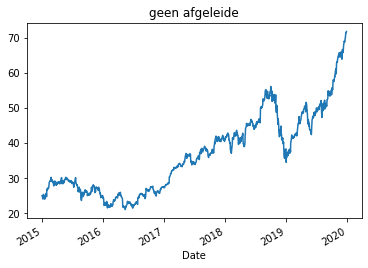

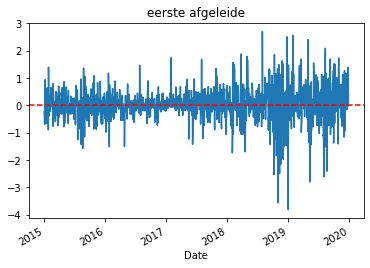

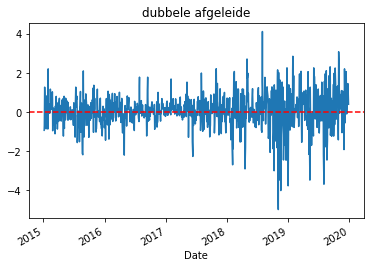

In [51]:
# [10 min] maak gebruik van de differentiatie-methode in Pandas en bepaal 'op het oog' wanneer de data stationair is.
# toon na elke differentiatiestap de lijngrafiek met de afgeleide data.

import pylab as plt

plt.figure()
plt.title('geen afgeleide')
df['Adj Close'].plot()

plt.figure()
plt.title('eerste afgeleide')
df['Adj Close'].diff().plot()
plt.axhline(0, ls='--', color='red')

plt.figure()
plt.title('dubbele afgeleide')
df['Adj Close'].diff(2).plot()
plt.axhline(0, ls='--', color='red')

Op het oog kunnen we nu al vaststellen dat de data stabiel (stationair) is. In [een gevorderde cursus](https://campus.datacamp.com/courses/arima-models-in-python/chapter-1-arma-models?ex=5) op Datacamp vinden we dat we de stabiliteit van data ook statistisch kunnen toetsen m.b.v. de Augmented Dicky-Fuller test.  

We voeren deze test eerst uit voor de oorspronkelijke dataset.
De test is statistisch significant bij een p-waarde kleiner dan 0,10 is. Dus de data is stationair als p<0,10. 

In [46]:
# [10 min] deze test kan niet overweg met missende waardes, daarom prepareren we de dataset die we meegeven aan de adfuller-functie.

from statsmodels.tsa.stattools import adfuller

result = adfuller(koers_aandeel['Adj Close'].dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.075850
p-value: 0.995005
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [47]:

result = adfuller(koers_aandeel['Adj Close'].diff().dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.344718
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [48]:

result = adfuller(koers_aandeel['Adj Close'].diff(2).dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.114920
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


**Was je conclusie 'op het oog' juist?**

In [ ]:
# [5 min] Voer de ADFuller-test uit voor elke afgeleide totdat het resultaat statistisch significant is. 

## Datapreparatie 
**Prepareer de data als dat nodig is: definieer de stationaire dataset en verwijder de rijen met missing values werk hiermee verder.** 

In [ ]:
# [1 min]
ARMA_data_slotkoers = df['Close'].diff()

# LES 2 ARIMA-model bouwen en gebruiken

### Model bouwen
#### Parameters instellen
Bij het opstellen van het ARIMA-model moeten we voor de I-parameter (integrated) de waarde 1 meegeven: `ARIMA(data, order=(?,1,?)).fit()`

We volgen de [Datacamp course](https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=13) verder en bepalen de waarde voor het voortschrijdend gemiddelde (moving average: MA) voor het tijdreeksmodel m.b.v. de autocorrelatie. 

*Definities*

Het ACF plot kijkt naar de correlatie van een waarde met vorige lags, maar houdt hierbij een rekening met het feit dat er eerder lags al waren.
Een lag is een vaste tijdsperiode. Afhankelijk van de trends in de data kun je een `lag` instellen op een jaar (bijv. temperatuur in Nederland), een maand (bijv. voor banksaldo van studenten), een week (bijv. aantal verplaatsingen i.v.m. woon-werkverkeer), etc. 

We importeren het package `plot_acf` uit de `statsmodels`-library om een autocorrelatieplot te kunnen maken. 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In de koers van het aandeel Apple lijkt geen terugkerend patroon te zitten. Dit betekent dat we geen `lag`-parameter hoeven in te stellen. 

In [ ]:
plot_acf(ARMA_data_slotkoers)

De auto-correlatiegrafiek wordt twee keer weergegeven. Voor het interpreteren van de grafiek hoeven we hier niets aan te doen. Het toepassen van de methode `gca()` zou het twee keer afbeelden van de grafiek voorkomen.

In dit autocorrelatieplot liggen bijna alle waardes binnen het lichtblauwe onzekerheidsgebied (deze variantie in autocorrelatie kan worden verklaard door ruis). Dit betekent dat we geen MA-parameter hoeven in te stellen. 

Voor de zekerheid bekijken we ook de autocorrelaties met een lag van een week.

In [ ]:
# [10 min] maak het autocorrelatieplot met lags van een week. 
# Hou er bij het bepalen van de lags rekening mee dat we alleen datapunten hebben voor de handelsdagen.
# Interpreteer de acf-plot voor het instellen van de MA-parameter. 
plot_acf(__________________, lags=_________)

Beide autocorrelatiegrafieken (zonder lag en met lag van een jaar) lijken erg op elkaar. We hoeven dus geen lag-parameter in te stellen. 

Op de allereerste waarde na ligt de autocorrelatie dicht bij 0. 

Conclusie: de MA-parameter hoeven we voor dit model dus niet in te stellen (dus geven we de waarde 0). De I-waarde was al bekend, nl. 1: `ARIMA(data, order=(?,1,0)).fit()`

Voor het aandeel Apple kan een moving average van 0 als volgt worden uitgelegd: het gewogen gemiddelde van de vorige slotkoersen heeft geen invloed op de huidige slotkoers.

Tenslotte moet nog worden vastgesteld hoeveel ruis er in het model zit en of deze ruis invloed heeft op de variantie van de slotkoersen; dit is de Auto Regressie (`AR`) waarde m.b.v. de partiële autocorrelatie. De partiële autocorrelatie geeft weer hoe sterk het verband is tussen de waarde van een lag en de waarde van voorgaande lags. Als er tussen de lags nog significante correlatie bestaat is dit een aanwijzing dat er auto-correlatie optreed en dat het instellen van de AR parameter een goed idee is. 

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
#[5 min]
plot_pacf(________________)

Veruit de meeste lags hebben een partiële autocorrelatie van dichtbij 0. We zien twee uitschieters naar boven en één naar beneden. Omdat het nu nog uitzonderingen zijn is dit onvoldoende om een AR-waarde toe te voegen.  De MA en I-waarde waren al bekend, we voegen de AR-waarde 0 toe: `ARIMA(data, order=(0,1,0)).fit()`

Nu we de parameters hebben vastgesteld kunnen we het tijdreeksmodel uitvoeren.

In [ ]:
#[5 min]
from statsmodels.tsa.arima_model import ARIMA

slotkoers_model = ARIMA(_______________)
slotkoers_model_fit = slotkoers_model.fit(disp=0)
print(slotkoers_model_fit.summary())
fig = slotkoers_model_fit.plot_predict(dynamic=False)

***
De waarschuwing negeren we voor nu omdat het voorgestelde package (nog) geen `predict plot` bevat. 
***

## Voorbeeld terugkerend patroon
Aandelenkoersen hebben dit vaak veel minder. Onderstaand voorbeeld met verkoopcijfers van een landbouwvoertuigenfabrikant bevat wel zo'n duidelijk patroon. Nu we een ARIMA model hebben gebouwd gaan we even terug naar wat we bij ADA met de hand en rekenmachine hebben gedaan.

In [ ]:
# [5 min]
from io import StringIO
import requests
import pandas as pd
verkoopdata = pd.read_csv(StringIO(requests.get('http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv').text
))
verkoopdata['Number of Tractor Sold'].plot(figsize=(16,10))

Bij ADA hebben we geleerd om als eerste te kijken naar de veranderingen in de pieken. We zien hier dat de amplitudes steeds groter worden. Het is daarom een multiplicatief model. De patronen gebruikten we om de spreidingsbreedte uit te rekenen en de storingsterm E konden we negeren (weglaten) in een multiplicatief model.

Daarna rekenen we het voortschrijdend gemiddelde uit. Met dit voortschrijdend gemiddelde wordt vervolgens een reguliere lineaire regressie gedaan. Ook wordt er gekeken naar de spreidingsbreedte per periode (im dit geval van 12 maanden). Waarschijnlijk neemt het verschil tussen minimum en maximum amplitude met een redelijk constante factor toe. Deze kun je uit de spreidingsbreedtetabel halen. Voorspellingen volgen uit de lineaire regressie vermenigvuldigd met de spreidingsbreedtefactor voor die maand. 

In het ARIMA model heeft de AR term invloed op het rustig of heftig golven van de lijn, en de MA term op de kleine afwijkingen. Waarschijnlijk is het nog beter om een SARIMA model te gebruiken als je seasonality herkend. 

### Model assessment
De p-waarde (P>|z|) gebruiken we om te bepalen of de losse componenten van het getrainde model (AR, I en MA) statistisch significant is. In dit model is de p-waarde <0.1, dit hadden we liever kleiner gezien (dus significanter), maar is voldoende acceptabel. 

*Definitie:* de BIC en AIC waarden zijn maten om te bepalen hoe goed een statistisch model van toepassing is. Het Akaike Information Criterium (AIC) is een criterium dat een compromis maakt tussen de kwaliteit van de fit en de complexiteit van het model. Hoe slechter de fit is, hoe hoger het AIC criterium. 

We beoordelen het door ons gekozen model door de AIC en BIC-waarden de vergelijken met ARIMA-modellen waar de AR en MA parameters wel zijn ingesteld.



In [ ]:
# [20 min] Train het tijdreeksmodel met de AR, I en MA in elk geval met de waarden (1,1,0), (0,1,1), (1,1,2), (2,1,1) en (2,1,2)
# Maak een keuze óf we een ARIMA-model kunnen toepassen om de aandelenkoers van het aandeel Apple te voorspellen. 
# Bij een positieve keuze: welke parameters zijn het geschiktst om te gebruiken?
# maak een afweging tussen fit en complexiteit. Kies het geschiktste model met de laagste complexiteit.b

In [ ]:
#Optioneel: gebruik deze code om de waarschuwingen over het gebruik van het verouderde package tijdelijk niet weer te geven.
import warnings, math

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    

De AIC en BIC-waarden zijn **wel/niet** vergelijkbaar. 

Conclusie: 
Het ARIMA-model is **wel/niet** geschikt om de aandelenkoers van Apple te voorspellen.

Hierbij gebruiken we de parametersettings:   

Toelichting: 


## Evaluatie
We kunnen het model nu gebruiken om te voorspellen hoeveel punten de slotkoers de volgende dag hoger of lager ligt.

Bekijk de huidige koers van het Apple aandeeld. In hoeverre komt de voorspelling overeen met de werkelijke koers? 

In [ ]:
#[5 min]